<h1> Flywheel Digital - Data Science Assessment

A project developed by:
Lilit Tonoyan

In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h2>  Initial Analysis

In [2]:
# Importing data set
df = pd.read_csv(r'./Case_study_junior_ds - case_study_junior_ds.csv')

In [3]:
# Checking number of variables and observations 
print('DF has {} rows  and {} variables'.format(df.shape[0],df.shape[1]))

DF has 469308 rows  and 5 variables


In [4]:
# Checking first rows
df.head()

,keyword_id,keyword_rank,date,searches,search_engine
0,338145,25218,2022-07-08,53000,0
1,366846,906743,2022-07-08,0,0
2,8590017696,136761,2022-07-08,7000,0
3,8590268435,60380,2022-07-08,20033,0
4,17179954797,239930,2022-07-08,2000,0


In [5]:
df.describe()

,keyword_id,keyword_rank,searches,search_engine
count,4.693080e+05,4.693080e+05,4.693080e+05,469308.000000
mean,1.955014e+12,7.439009e+05,8.550373e+03,6.818188
std,1.290018e+12,1.388063e+06,8.279563e+04,5.185202
min,5.850000e+03,3.000000e+00,0.000000e+00,0.000000
25%,7.988642e+11,7.421850e+04,0.000000e+00,3.000000
50%,1.838246e+12,2.360955e+05,0.000000e+00,5.000000
75%,3.049427e+12,7.821010e+05,3.000000e+03,10.000000
max,4.389457e+12,1.391182e+07,1.863716e+07,25.000000


In [6]:
# Checking types 
df.dtypes

keyword_id        int64
keyword_rank      int64
date             object
searches          int64
search_engine     int64
dtype: object

In [7]:
# Checking nulls
df.isnull().sum()

keyword_id       0
keyword_rank     0
date             0
searches         0
search_engine    0
dtype: int64

In [8]:
#Checking duplicates
duplicates = df.duplicated()
duplicates.sum()


0

In [9]:
# Checking the number of Search Engines
df['search_engine'].nunique()

26

In [10]:
# Checking date diversity
df['date'].nunique()


7

In [11]:
# Cheking the hightest and lowest ranks
High_rank = df['keyword_rank'].min()
Low_rank = df['keyword_rank'].max()
print("Highest rank:", High_rank, "\nLowest rank:", Low_rank)

Highest rank: 3 
Lowest rank: 13911821


From initial analysis we can conclude that: 
- Dataset size: 469,308 rows and 5 columns.
- Data types: 'keyword_id', 'keyword_rank', 'searches', 'search_engine' are integers (int64).
 'date' is an object 
- No missing values or duplicated rows in the dataset.
- The dataset includes 7 unique dates.
- There are 26 unique search engines.
After  checking the higest and lowest ranks, it is obvious  that the hightes rank is 3

<h2> Data Preparation

In [12]:
# Converting 'date' column to datetime format for better visualization results.
df['date'] = pd.to_datetime(df['date'])


In [13]:
# Sort the DataFrame by 'keyword_rank' to see the top ranks
df = df.sort_values(by='keyword_rank', ascending=True)
df.head(10)


,keyword_id,keyword_rank,date,searches,search_engine
399058,1554778255514,3,2022-07-08,2320465,13
410678,1554778255514,3,2022-07-14,2020650,13
402936,1554778255514,3,2022-07-10,8312244,13
404919,1554778255514,3,2022-07-11,10424650,13
292355,1606317975332,3,2022-07-09,1334983,8
408801,1554778255514,3,2022-07-13,1965862,13
303484,1606317975332,3,2022-07-14,1213935,8
406894,1554778255514,3,2022-07-12,2172276,13
400944,1554778255514,4,2022-07-09,2490750,13
290109,1606317975332,5,2022-07-08,1269056,8


From the table it can be concluded that search engines 8 and 13 are the most used to search for keywords with top ranks. Specifically, keyword rank 3 appears to be associated with both search engines 8 and 13.

<h2>  Visualizations

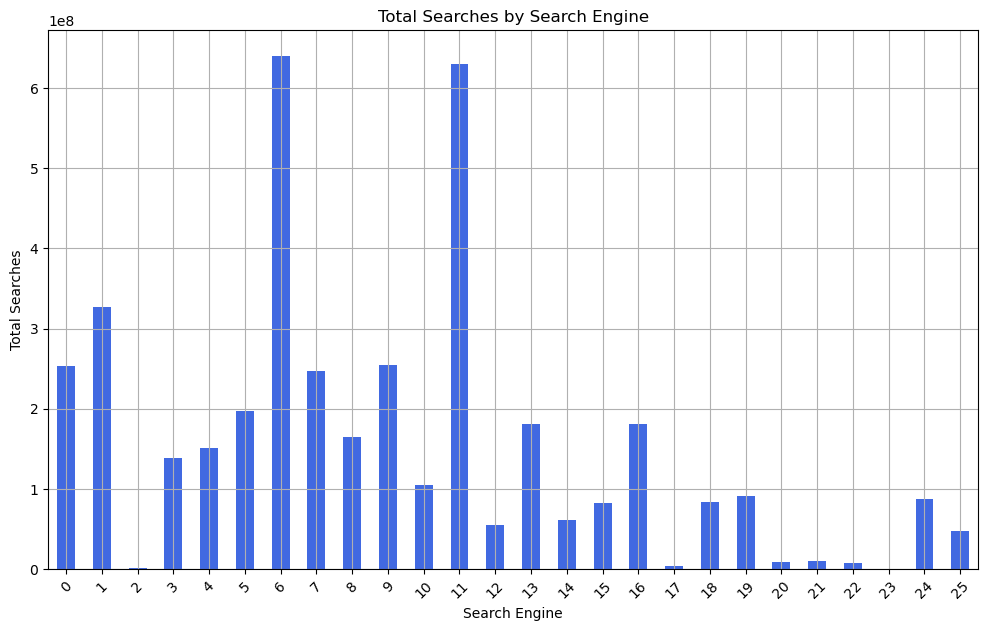

In [14]:
# Plotting the total searches by search engine to get some idea about usage of each search engine
total_searches_by_engine = df.groupby('search_engine')['searches'].sum()

# Plotiing
total_searches_by_engine.plot(kind='bar', color='royalblue', figsize=(12, 7))
plt.title('Total Searches by Search Engine')
plt.xlabel('Search Engine')
plt.ylabel('Total Searches')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


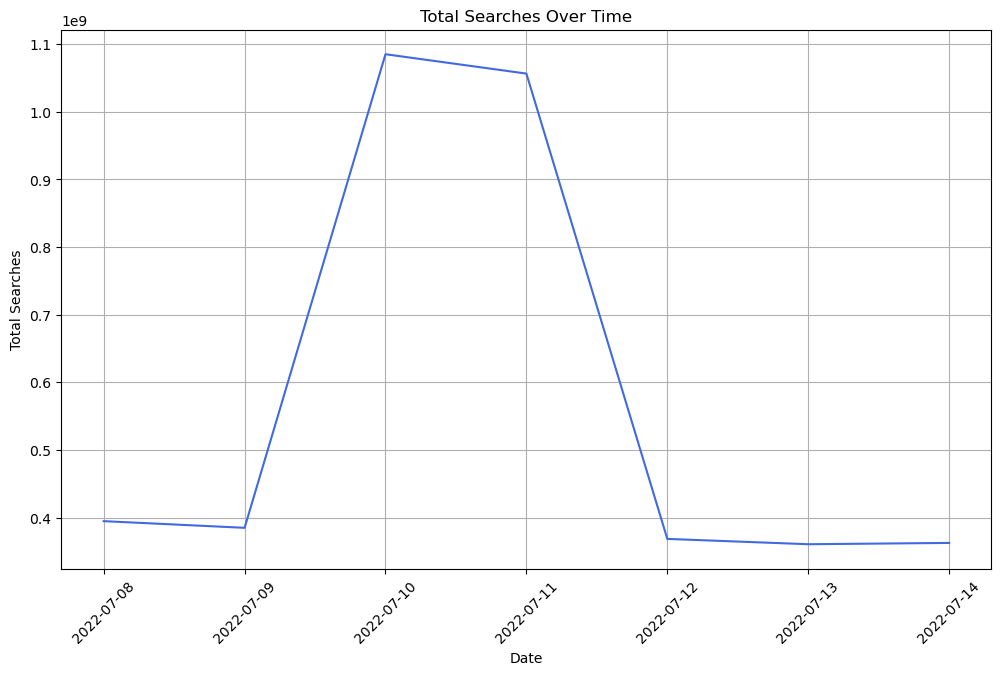

In [15]:
# Plotting total searches over time
# Group data by date and sum searches
datewise_searches = df.groupby('date')['searches'].sum().reset_index()

# Plotting
plt.figure(figsize=(12, 7))
sns.lineplot(data=datewise_searches, x='date', y='searches', color = 'royalblue')
plt.title('Total Searches Over Time')
plt.xlabel('Date')
plt.ylabel('Total Searches')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


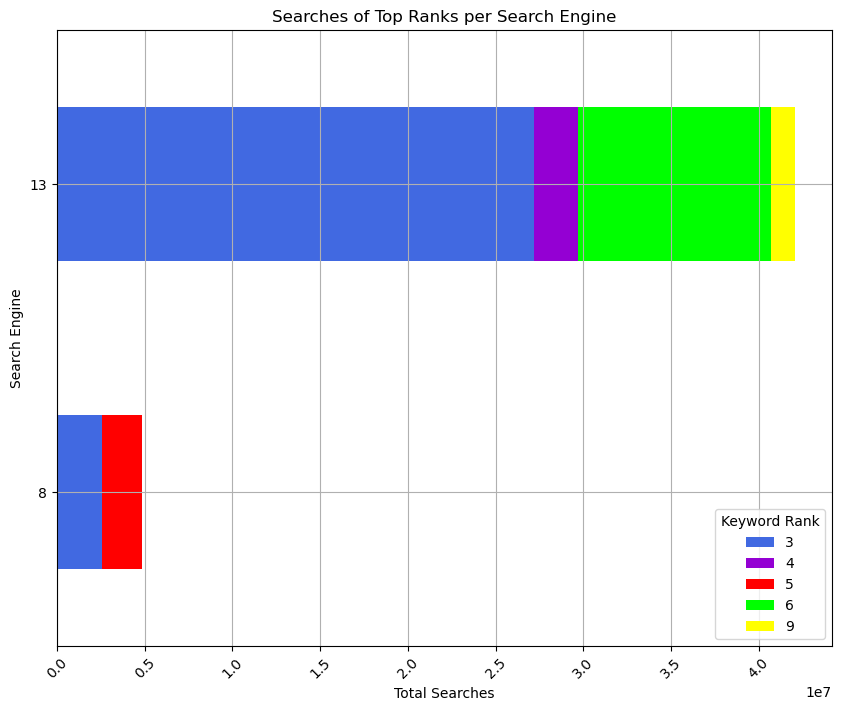

In [16]:
# Searches of Top Ranks for each Search Engine
# Filter the df to get top ranks
top_ranks = df[df['keyword_rank'].between(3, 9)]
colors = ['royalblue', 'darkviolet', 'red', 'lime', 'yellow']

# Grouping by search engine, rank and sum
grouped_data = top_ranks.groupby(['search_engine', 'keyword_rank'])['searches'].sum().unstack()

# Plotting 
grouped_data.plot(kind='barh', figsize=(10, 8), stacked=True, color = colors)
plt.title('Searches of Top Ranks per Search Engine')
plt.xlabel('Total Searches')
plt.grid(True)
plt.ylabel('Search Engine')
plt.legend(title='Keyword Rank')
plt.xticks(rotation=45)
plt.show()


These visuals provide insights into search engine performance, trends over time, and the relationship between keyword ranks and search engines. 
The visuals show that Search Engine 6 and Search Engine 11 dominate in driving overall search traffic. The date-wise search trends highlight specific dates with significant search volume increases, which could show important events or campaigns. The stacked bar chart illustrates that Search Engine 13 consistently outperforms Search Engine 8 for top keyword ranks, especially rank 3. 

<h2> Question:
    According to this data, how many searches does the keyword with rank 1 receive for each search engine?

After analyzing the data, it's clear that there is a lack of information about keywords with rank 1. One approach could be creating of a prediction model based on the search volumes of top-ranked keywords, assuming that search engines 8 and 13 are mostly used for these high-ranking keyword searches. However, it's essential to note that this prediction model may not perform well due to the absence of data for keywords with rank 1. Prediction models rely on historical data, and without specific data for rank 1 keywords, it's not possible to accurately estimate their search volumes using this approach. To create a reliable prediction model for rank 1 keywords, access to data specifically related to those keywords would be necessary. Without such data, estimating the search volume for rank 1 keywords based on top keywords is not practical.

Another alternative approach is to analyze the search volumes of keywords with rank 3 for each search engine. Rank 3 can be considered the highest rank within available data. This analysis can offer valuable insights into the search volumes associated with these keywords across search engines.

In [17]:
# Filter data for keyword_rank 3
rank_3_data = df[df['keyword_rank'] == 3]

# Group by search engine and sum searches
searches_by_engine_rank_3 = rank_3_data.groupby('search_engine')['searches'].sum()
total_searches_rank_3 = rank_3_data['searches'].sum()



In [18]:
# DataFrame to store the results
results_df = pd.DataFrame({
    'Search Engine': searches_by_engine_rank_3.index,
    'Searches': searches_by_engine_rank_3.values
})

print("Searches for Rank 3 Keywords:")
for index, row in results_df.iterrows():
    print(f"Search Engine {row['Search Engine']} has {row['Searches']} searches.")
    


Searches for Rank 3 Keywords:
Search Engine 8 has 2548918 searches.
Search Engine 13 has 27216147 searches.


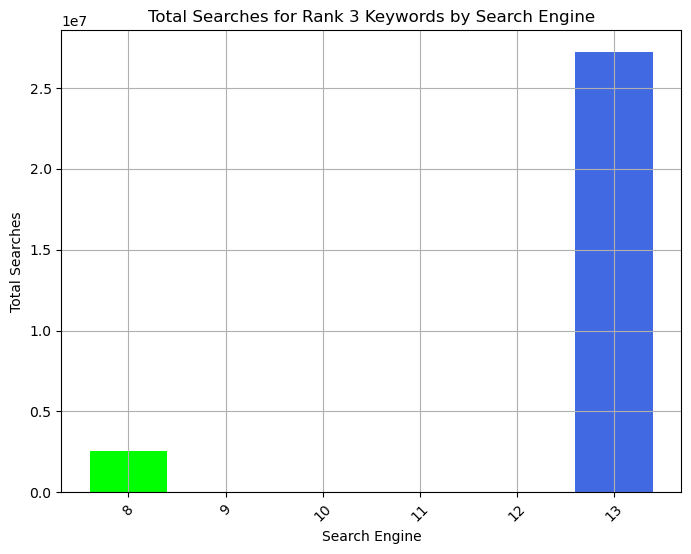

In [19]:
# Plotting the Results
search_engines = searches_by_engine_rank_3.index
total_searches = searches_by_engine_rank_3.values

plt.figure(figsize=(8, 6))
plt.bar(search_engines, total_searches, color=['lime', 'royalblue'])  # Use the colors you provided
plt.xlabel('Search Engine')
plt.ylabel('Total Searches')
plt.title('Total Searches for Rank 3 Keywords by Search Engine')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

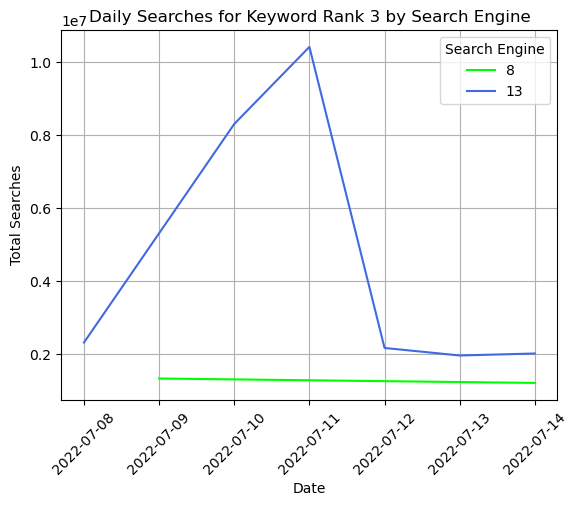

In [20]:
# Showing the results for each search engine over time
sns.lineplot(data=rank_3_data, x='date', y='searches', hue='search_engine',  palette=['lime', 'royalblue'] )
plt.title('Daily Searches for Keyword Rank 3 by Search Engine')
plt.xlabel('Date')
plt.ylabel('Total Searches')
plt.xticks(rotation=45)  
plt.legend(title='Search Engine')
plt.grid(True)
plt.show()



Based on the data and visualizations, it's clear that search engine 13 is more popular for rank 3 keywords compared to search engine 8, as seen by the total search count of over 27 million versus around 2.5 million. The daily search trends for the keywords show a peak in search activity on search engine 13, notably on July 11, 2022, with a sharp decline after, whereas search engine 8 maintains a relatively flat line, indicating a steady but low search volume. These patterns suggest that search engine 13 might be more effectively optimized or more widely preferred.